# ДЗ №2 по курсу "Прикладная теория графов"

> **Выполнил:** Максимов Константин 


## Анализ графов Global Terrorist Database ###

#### Дисклеймер: для выполнения заданий за баллы запрещено использовать методы из пакетов Python

1. Загрузите данные из globalterrorismdb_0718dist.xlsx

2. Создайте графы G1 и G2 за 2 разных года (вершиной является eventid, списком смежности related; года должны быть не обязательно последовательными, но не ранее 2000 года)

3. Удалите из графов изолированные вершины и мультиребра

4. Посчитайте для графов G1 и G2 graph edit distance (https://en.wikipedia.org/wiki/Graph_edit_distance). Сделайте вывод о полученном "расстоянии" (3 балла)

5. Посчитайте ключевые метрики для каждого графа: diameter, eccentricity, periphery, girth, expansion. Сделайте вывод о схожести графов (по 0.2 балла за каждую метрику)

6. Посчитайте Wiener_index для каждого графа (https://en.wikipedia.org/wiki/Wiener_index). Сделайте вывод о схожести графов (2 балла)

7. Посчитайте Hosoya_index для каждого графа (https://en.wikipedia.org/wiki/Hosoya_index). Сделайте вывод о схожести графов (2 балла)

8. Для каждого графа найдите ядро. Сделайте вывод о схожести графов (2 балла)

#### Для вывода о схожести графов в пп. 5-8 придумайте какую-нибудь метрику, вычисляющую "расстояние" между графами на основе полученных значений индекса/характеристики (и обоснуйте, почему ваша метрика рациональна, т.е. реально отражает схожесть графов в рамках данных расчетных индексов/характеристик)

### Формат выполнения задания:
- код на Python (приоритетно), R (менее приоритетно), Java (наименее приоритетно), C++ (совсем нежелательно)
- код необходимо выложить в личный репозиторий (GitHub, BitBucket)
- ссылку на репозиторий необходимо отправить мне в Telegram (@CroCode)
- дедлайн выполнения задания: 20 декабря (четверг), 08:59 утра

### 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import re
import itertools
from random import shuffle
%matplotlib inline

In [2]:
df = pd.read_excel('globalterrorismdb_0718dist.xlsx')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### 2.

In [150]:
year1 = df[['eventid','related']].loc[df.iyear == 2007].dropna().set_index('eventid')
year2 = df[['eventid','related']].loc[df.iyear == 2008].dropna().set_index('eventid')

In [151]:
year1['related'] = year1['related'].apply(lambda x: list(map(int, (x.split(',')))))
year2['related'] = year2['related'].apply(lambda x: list(map(int, (x.split(',')))))

In [152]:
G1 = nx.Graph(year1.to_dict()['related'])
G2 = nx.Graph(year2.to_dict()['related'])

### 3.

Удаляем петли

In [153]:
G1.remove_edges_from(G1.selfloop_edges())
G2.remove_edges_from(G2.selfloop_edges())

Ищем самые большие компоненты связанности

In [154]:
c_n1 = 7
prober1 = list(sorted(nx.connected_component_subgraphs(G1), key = len))
for p in prober1[:-c_n1]:
    G1.remove_edges_from(p.edges())
G1.remove_nodes_from(list(nx.isolates(G1)))
cliques1 = prober1[-c_n1:]

Проверим, действительно ли все компоненты - полные графы:

In [198]:
for c in cliques1:
    if c.size() != len(c)*(len(c)-1)/2:
        print("Ops")

Добавляем случайные перемычки (2-4 штуки на компоненту)

In [155]:
random_nodes1 = sum([list(np.random.choice(p, 4, replace=True)) for p in prober1[-c_n1:]], [])

In [156]:
shuffle(random_nodes1)
random_bridges1 = np.array(random_nodes1).reshape(-1,2)

In [157]:
bridges1 = []
for b in random_bridges1:
    if b not in G1.edges():
        bridges1.append(b)
G1.add_edges_from(bridges1)

56

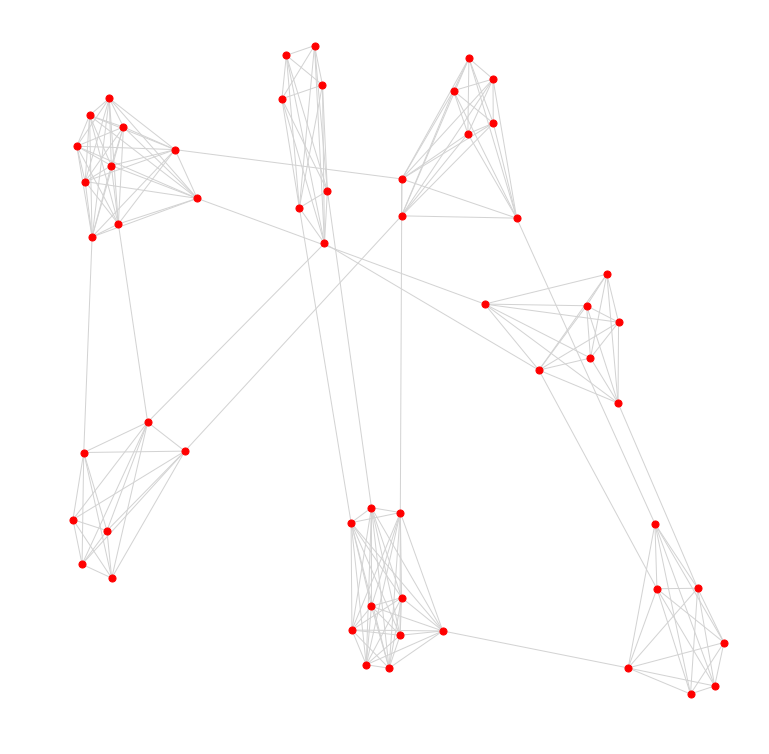

In [158]:
plt.figure(figsize=(10,10))
nx.draw(G1, node_size = 50, edge_color = 'lightgray')
len(G1)

Повторяем всё тоже самое для 2го графа:

In [159]:
c_n2 = 5
prober2 = list(sorted(nx.connected_component_subgraphs(G2), key = len))
for p in prober2[:-c_n2]:
    G2.remove_edges_from(p.edges())
G2.remove_nodes_from(list(nx.isolates(G2)))
cliques2 = prober2[-c_n2:]

In [199]:
for c in cliques2:
    if c.size() != len(c)*(len(c)-1)/2:
        print("Ops")

In [160]:
random_nodes2 = sum([list(np.random.choice(p, 4, replace=False)) for p in prober2[-c_n2:]], [])

In [161]:
shuffle(random_nodes2)
random_bridges2 = np.array(random_nodes2).reshape(-1,2)

In [162]:
bridges2 = []
for b in random_bridges2:
    if b not in G2.edges():
        bridges2.append(b)

G2.add_edges_from(random_bridges2)

64

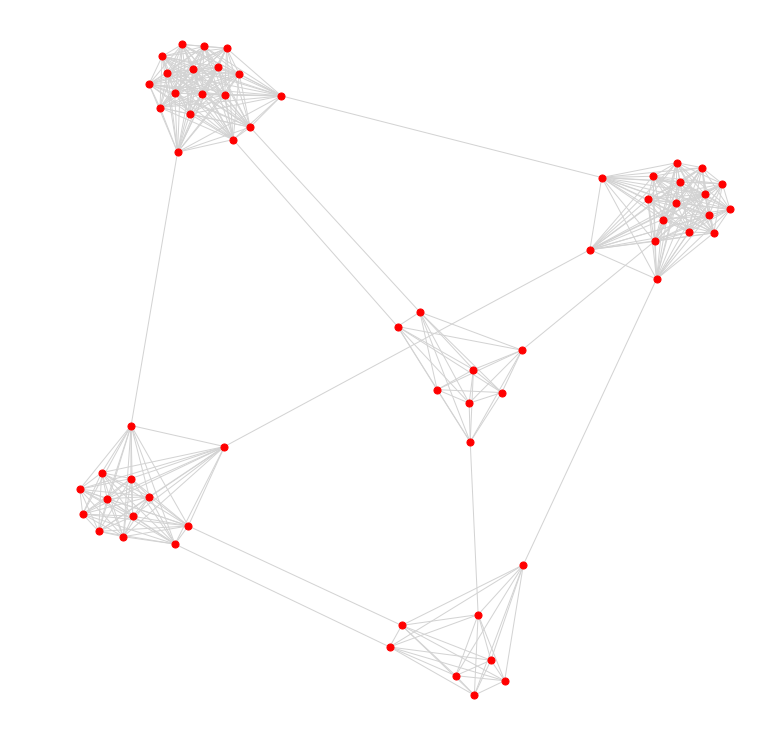

In [163]:
plt.figure(figsize=(10,10))
nx.draw(G2, node_size = 50, edge_color = 'lightgray')
len(G2)

### 4.

TBD

P.S.: Можно было бы рассмотреть какие-нибудь частные случаи с красиво и правильно соединёнными кликами, но как-то это противоречит духу задания. Написать, а главное отладить полноценный алгоритм видится невозможным за отведённое время (даже метод из networx падает на этих графах или, если повезёт, считает вечность) :\

### 5.

Подсчитаем матрицы кратчайших расстояний для наших графов алгоритмом Флойда:

In [164]:
from math import inf
from itertools import product
 
def floyd_warshall(G):
    dist = nx.to_numpy_matrix(G, nonedge = np.inf)
    np.fill_diagonal(dist,0)
    for k, i, j in product(range(len(G)), repeat=3):
        if dist[i,k] < np.inf and dist[k,j] < np.inf:
            dist[i,j] = min(dist[i,j], dist[i,k] + dist[k,j]);
    return dist

In [165]:
dist1 = floyd_warshall(G1)

In [166]:
dist2 = floyd_warshall(G2)

**diameter**  
Просто максимальное значение из матрицы расстояний.

In [167]:
diameter1 = dist1.max()
diameter1

5.0

In [168]:
diameter2 = dist2.max()
diameter2

5.0

Предлагаемая метрика: отношение отношений количества рёбер к диаметру.

In [215]:
diameter_metric = (G1.size()/diameter1) / (G2.size()/diameter2)
diameter_metric

0.49884526558891462

"Рёберная плотность" второго графа значительно выше.

**eccentricity**  
Для каждой вершины сумма по соответствующей строке матрице расстояний.

In [169]:
eccentricity1 = np.amax(dist1, axis=0)
eccentricity1

matrix([[ 5.,  5.,  4.,  5.,  4.,  5.,  5.,  4.,  5.,  5.,  4.,  4.,  5.,
          5.,  4.,  5.,  5.,  5.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
          4.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  5.,  5.,  5.,  4.,  5.,
          5.,  4.,  5.,  5.,  5.,  4.,  5.,  5.,  5.,  5.,  4.,  5.,  5.,
          5.,  5.,  4.,  5.]])

In [170]:
radius1 = eccentricity1.min()
radius1

4.0

In [171]:
eccentricity2 = np.amax(dist2, axis=0)
eccentricity2

matrix([[ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  4.,  5.,  5.,  4.,  4.,
          4.,  4.,  5.,  5.,  4.,  5.,  5.,  4.,  3.,  3.,  3.,  3.,  3.,
          3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  5.,
          5.,  5.,  5.,  5.,  5.,  4.,  5.,  5.,  4.,  5.,  4.,  5.,  5.,
          4.,  5.,  5.,  5.,  4.,  5.,  4.,  4.,  5.,  4.,  5.,  5.]])

In [172]:
radius2 = eccentricity2.min()
radius2

3.0

Предлагаемая метрика: отношение отношений среднего эксцентриситета к диаметру.

In [211]:
eccentricity_metric = (eccentricity1.mean()/diameter1) / (eccentricity2.mean()/diameter2)
eccentricity_metric

1.1259259259259258

Близкое к 1 значение показывает что средняя удалённость вершин очень похожа.

**periphery**  
Вершины, eccentricity которых равен диаметру.

In [173]:
periphery1 = [list(G1.nodes())[i] for i,e in enumerate(np.nditer(eccentricity1)) if e == diameter1]
print(periphery1)

[200705270009, 200705270010, 200705270012, 200705270014, 200705270015, 200706010020, 200706010021, 200706010024, 200706010025, 200706070022, 200706070023, 200706070024, 200706070026, 200706070027, 200706080024, 200706080025, 200706080026, 200706080027, 200706080028, 200706080030, 200706080031, 200706130040, 200706130041, 200706130042, 200706130043, 200706130045, 200706130046, 200706130047, 200706130049, 200710010001, 200710010005, 200710010007, 200710010008, 200710010010, 200710310001, 200710310002, 200710310003, 200710310005, 200710310006, 200710310007, 200710310008, 200710310010]


In [174]:
periphery2 = [list(G2.nodes())[i] for i,e in enumerate(np.nditer(eccentricity2)) if e == diameter2]
print(periphery2)

[200802210008, 200802210009, 200802210010, 200802210011, 200802210012, 200802210013, 200802210014, 200802210017, 200802210018, 200807250006, 200807250008, 200807250010, 200807250011, 200807290007, 200807290008, 200807290009, 200807290010, 200807290011, 200807290012, 200807290014, 200807290015, 200807290017, 200807290019, 200807290020, 200807290025, 200807290029, 200807290031, 200811260001, 200811260005, 200811260009, 200811260010]


Предлагаемая метрика: отношение отношений количества периферийных вершин к количеству вершин

In [217]:
periphery_metric = (len(periphery1)/len(G1)) / (len(periphery2)/len(G2))
periphery_metric 

1.5483870967741935

Близкий показатель, оба графа схожи по "хвостатости"

**girth**  
Для каждой вершины будем искать обходом в глубину за какое количество шагов мы вернёмся в неё, минимальное количество шагов и есть искомое значение.

In [175]:
def dfs(G, node, first, visited, counter):
    if node == first and counter > 2:
        return counter
    if node not in visited:
        visited.append(node)
        cicles = []
        for n in list(G[node]):
            cicles.append(dfs(G,n,first,visited,counter+1))
        return min(cicles)
    return np.inf

def girth(G):
    cicles = []
    for node in list(G.nodes()):
        visited = []
        cicles.append(dfs(G, node, node, visited, 0))
    return min(cicles)

In [176]:
girth1 = girth(G1)
girth1

3

In [177]:
girth2 = girth(G2)
girth2

3

Предлагаемая метрика: простое отношение

In [219]:
girth_metric = girth1/girth2
girth_metric

1.0

Схожесть размеров минимальной "соты" (для наших графов идентична)

**expansion**

TBD

### 6.  
Индекс Винера - половина суммы всех кратчайших расстояний графа.

In [178]:
wiener1 = dist1.sum().sum()/2
wiener1

4725.0

In [179]:
wiener2 = dist2.sum().sum()/2
wiener2

5280.0

Предлагаемая метрика: отношение отношений индекса к числу вершин

In [225]:
wiener_metric = (wiener1 / len(G1))/(wiener2 / len(G2))
wiener_metric

1.0227272727272727

Близкий к 1 результат показывает, что средняя достижимость вершин для графов одинакова.

### 7.

Индекс Хосойи для полного графа мы можем посчитать используя аналитическую формулу (http://oeis.org/A000085), поэтому надо только аккуратно скомбинировать с учётом перемычек.

$a(n) = a(n-1) + (n-1)\cdot a(n-2), $  $n > 1$

In [180]:
def full_hosoya(n):
    a0 = 1
    a1 = 1
    a2 = 1
    for i in range(1,n+1):
        a2 = a1 + (i-1)*a0
        a0 = a1
        a1 = a2
    return a2

Глянем на перемычки:

In [181]:
G1_bridges = nx.Graph()
G1_bridges.add_edges_from(bridges1)

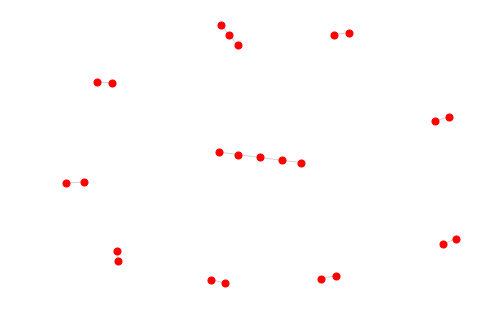

In [182]:
nx.draw(G1_bridges, node_size = 50, edge_color = 'lightgray')

In [183]:
G2_bridges = nx.Graph()
G2_bridges.add_edges_from(bridges2)

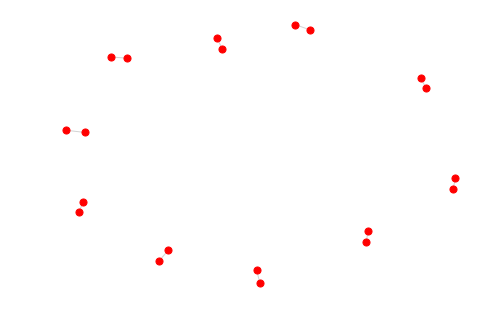

In [184]:
nx.draw(G2_bridges, node_size = 50, edge_color = 'lightgray')

Будем перебирать все возможные паросочетания на перемычках и вычислять соответствующее произведение паросочетаний клик (при этом концы перемычек из клик "выбрасываем", т.е. получаются клики меньшего размера)

In [203]:
from functools import reduce

def hosoya(G1, G_cliques, G_bridges):
    hosoya = 0
    for n in range(len(G_bridges.edges())):
        for comb in itertools.combinations(list(G_bridges.edges()), n):
            pool = []
            for e in comb:
                # Условие нарушится, если выбранные пары не являются паросочетанием
                if e[0] not in pool and e[1] not in pool:
                    pool.append(e[0])
                    pool.append(e[1])
                else:
                    break
            # Условие выполнится, если не выполнилось условие выше
            # Тогда пропускаем комбинацию
            if len(pool) != 2*n:
                continue

            # Выкидываем из компонент выбранные точки
            G = G1.copy()
            G.remove_edges_from(G_bridges.edges())
            G.remove_nodes_from(pool)
            
            # Подсчитываем размеры получившихся компонент
            cliques_sizes = [len(sg) for sg in nx.connected_component_subgraphs(G)]

            # Подсчитываем индекс Хосойи для каждой компоненты 
            h = [full_hosoya(s) for s in cliques_sizes]

            # Перемножаем и добавляем к общему индексу
            hosoya += reduce(lambda x, y: x*y, h)
    return hosoya

In [227]:
hosoya1 = hosoya(G1, cliques1, G1_bridges)
hosoya1

704112573990734493696

In [228]:
hosoya2 = hosoya(G2, cliques2, G2_bridges)
hosoya2

133033970268805630477191387136

In [226]:
full_hosoya(60)

27287539950459819893102799433172013791543296

Предлагаемая метрика: отношение отношений индекса к индексу полного графа такого же размера

In [231]:
hosoya_metric = (hosoya1 / full_hosoya(len(G1))) / (hosoya2 / full_hosoya(len(G2)))
hosoya_metric

0.11440183713335927

Существенная разница, первый граф более разрежен

### 8.  
Попробовал прямо реализовать алгоритм Магу, всё ломается на моменте вычисления ДНФ с использованием pyeda :(  
Придётся работать ручками.

- Наши графы состоят из клик, соединённых перемычками.
- Знаем, что для полного графа ядро - это любая его вершина.
- Поэтому, если в наших графах нету клик, состоящих только лишь из концов рёбер перемычек, для нахождения ядра достаточно выбрать в каждой клике по одной вершине не принадлежащей такой перемычке.

Чекаем, не состоят ли клики из концов мостов:

In [188]:
for c in cliques1:
    if set(c.nodes()).issubset(set(G1_bridges.nodes())):
        print("Ops")

In [189]:
for c in cliques2:
    if set(c.nodes()).issubset(set(G2_bridges.nodes())):
        print("Ops")

Всё в порядке, теперь случайным образом соберём ядра:

In [190]:
core1 = []
for c in cliques1:
    c_cop = c.copy()
    c_cop.remove_nodes_from(G1_bridges.nodes())
    core1.append(np.random.choice(list(c_cop.nodes()), 1, replace=True))

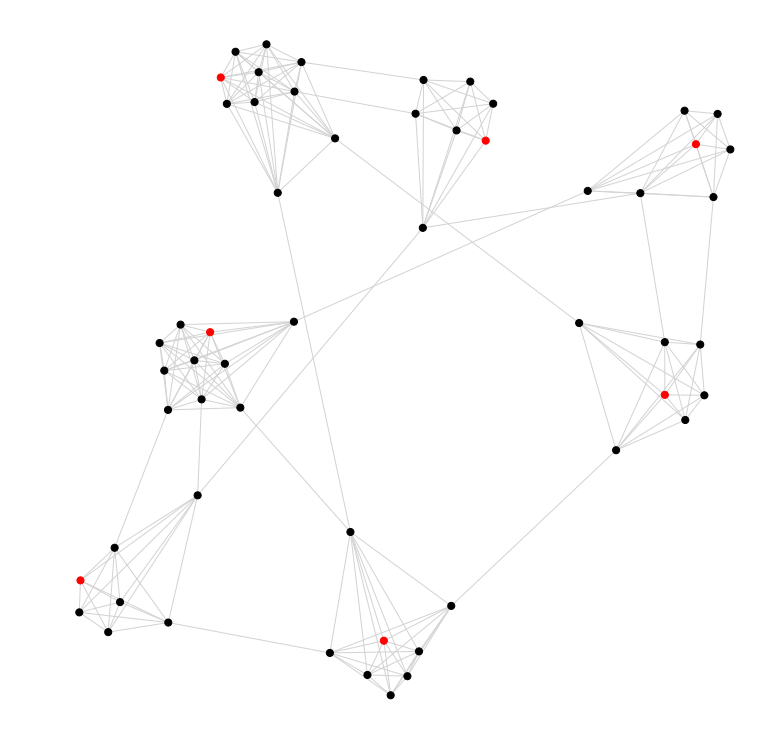

In [191]:
colors = ['black', 'red']
col1 = []
for n in list(G1.nodes()):
    if n in core1:
        col1.append(colors[1])
    else:
        col1.append(colors[0])

plt.figure(figsize=(10,10))
nx.draw(G1, node_size = 50, edge_color = 'lightgray',  node_color = col1)

In [192]:
core2 = []
for c in cliques2:
    c_cop = c.copy()
    c_cop.remove_nodes_from(G2_bridges.nodes())
    core2.append(np.random.choice(list(c_cop.nodes()), 1, replace=True))

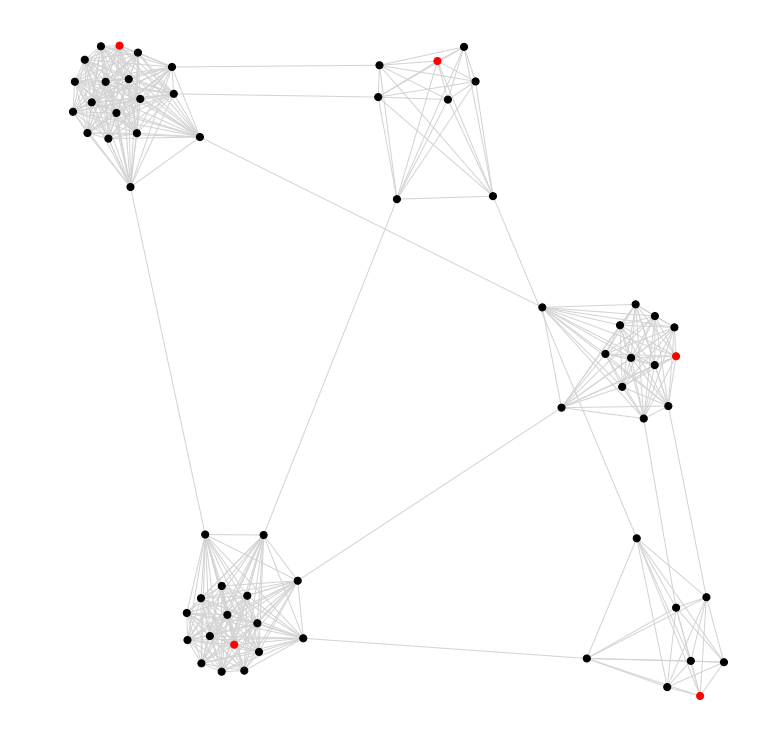

In [195]:
colors = ['black', 'red']
col2 = []
for n in list(G2.nodes()):
    if n in core2:
        col2.append(colors[1])
    else:
        col2.append(colors[0])

plt.figure(figsize=(10,10))
nx.draw(G2, node_size = 50, edge_color = 'lightgray',  node_color = col2)

Очевидно, что полученные точки удволетворяют свойтвам множеств внутренней и внешней устойчивости.

Предлагаемая метрика: отношение отношений количествf вершин к размеру ядра

In [224]:
core_metric = (len(G1)/len(core1))/(len(G2)/len(core2))
core_metric

0.625

Второй граф заметно легче "стабилизировать", т.е. устойчивость достигается выбором меньшего относительного числа вершин.